In [107]:
import pandas as pd
import numpy as np

file_path = r'C:\Users\newus\Desktop\Applied Project\asset_returns.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the data
print(data.head())


   -0.005763  -0.026772  -0.08766   0.026042  -0.00365  -0.074595  -0.057377  \
0   0.058059   0.113269  0.175373   0.096116  0.076657   0.120327   0.010870   
1  -0.037039   0.035610 -0.026984  -0.077318 -0.144086  -0.012513  -0.053763   
2   0.055546  -0.002807  0.093801   0.044626  0.089131   0.062302   0.011364   
3   0.037787   0.035890  0.021626   0.163150  0.064524   0.053678   0.024719   
4  -0.027950   0.001359 -0.032117   0.000000  0.011108  -0.003774   0.030702   

   -0.084338  -0.084821   0.081127  ...  -0.049128  -0.094203       0.1  \
0   0.102639   0.154634   0.130871  ...  -0.029639   0.160000 -0.083081   
1  -0.031031  -0.013519  -0.117281  ...  -0.014870  -0.006897 -0.178512   
2   0.067736   0.018844   0.013110  ...   0.052459  -0.055556 -0.051674   
3   0.035753  -0.121480   0.033673  ...   0.046823   0.077206  0.036358   
4   0.004454  -0.055981  -0.016692  ...  -0.017314   0.126280  0.056114   

   -0.083417   0.109715  -0.025634   0.015899  -0.014392   0.042297 

In [108]:


def rolling_mean_with_step_fast(df, window, step):
    """
    Optimized rolling mean using NumPy stride tricks.
    Fully equivalent to your original rolling_mean_with_step().
    """

    # DataFrame → numpy array
    X = df.to_numpy()
    n_rows, n_cols = X.shape

    # How many windows?
    n_windows = (n_rows - window) // step + 1

    # Strides (no copies)
    stride0, stride1 = X.strides
    windows = np.lib.stride_tricks.as_strided(
        X,
        shape=(n_windows, window, n_cols),
        strides=(step * stride0, stride0, stride1),
        writeable=False
    )

    # Compute each window mean
    means = windows.mean(axis=1)  # shape: (n_windows, n_cols)

    # Index of each window
    index = list(range(0, n_rows - window + 1, step))

    # Return perfect replacement
    return pd.DataFrame(means, index=index, columns=df.columns)


In [109]:
window_size = 200
step_size = 24
n = data.shape[1]
rolling_means = rolling_mean_with_step_fast(data, window_size, step_size)

# Rename the columns
rolling_means.columns = [f"Asset {i+1}" for i in range(len(rolling_means.columns))]

# Display the rolling means
print("\nRolling Mean (window=3, step=2):")
print(rolling_means)
def rolling_covariance_opt(df, window, step):
    arr = df.to_numpy()                       # Convert once → contiguous array
    n_rows, n_cols = arr.shape

    covariances = {}
    indices = []

    for start in range(0, n_rows - window + 1, step):
        window_arr = arr[start:start+window]  # contiguous slice → no copies

        # Compute covariance manually via NumPy (vectorized)
        X = window_arr - window_arr.mean(axis=0)
        cov = (X.T @ X) / (len(window_arr) - 1)

        covariances[start] = cov
        indices.append(start)

    return covariances



Rolling Mean (window=3, step=2):
      Asset 1   Asset 2   Asset 3   Asset 4   Asset 5   Asset 6   Asset 7  \
0    0.001711  0.004165  0.002215  0.002276  0.002809  0.002226  0.004360   
24   0.002084  0.004553  0.001308  0.001031  0.003412  0.002031  0.004824   
48   0.001366  0.004465  0.001116  0.001313  0.003928  0.001765  0.005723   
72   0.000535  0.004251  0.000398  0.001566  0.003296  0.001848  0.005170   
96   0.000349  0.004446 -0.000026  0.000997  0.001603  0.000548  0.002726   
120  0.000184  0.004233  0.000669  0.000448  0.002679  0.000244  0.002723   
144 -0.001981  0.003218  0.000016  0.000374 -0.004105 -0.000192  0.002142   
168  0.000597  0.002738 -0.000536  0.000100  0.000072 -0.000307  0.002236   
192  0.000442  0.002232 -0.000539  0.001123 -0.001392  0.000239  0.003093   
216  0.000171  0.002489 -0.000741  0.001878 -0.001108 -0.000907  0.004172   
240  0.000726  0.002739 -0.000151  0.001548 -0.001237  0.000359  0.004310   
264  0.000370  0.002937  0.000491  0.00078

In [110]:
rolling_covariances = rolling_covariance_opt(data, window_size, step_size)

# Display the rolling covariances
for window, cov_matrix in rolling_covariances.items():
        print(f"\nCovariance Matrix for {window}:")
        print(cov_matrix)


Covariance Matrix for 0:
[[6.00640129e-04 1.98788621e-04 4.09617135e-04 ... 3.71011494e-04
  2.98327199e-04 1.19038641e-04]
 [1.98788621e-04 7.39864854e-04 2.02521283e-04 ... 1.48371400e-04
  2.79831871e-04 5.22793790e-05]
 [4.09617135e-04 2.02521283e-04 1.27088096e-03 ... 2.38639527e-04
  3.78407505e-04 1.04207464e-04]
 ...
 [3.71011494e-04 1.48371400e-04 2.38639527e-04 ... 1.13542245e-03
  2.15318007e-04 2.45561148e-04]
 [2.98327199e-04 2.79831871e-04 3.78407505e-04 ... 2.15318007e-04
  8.12665160e-04 7.73379517e-05]
 [1.19038641e-04 5.22793790e-05 1.04207464e-04 ... 2.45561148e-04
  7.73379517e-05 1.19058643e-03]]

Covariance Matrix for 24:
[[4.55215084e-04 1.72408072e-04 3.20987401e-04 ... 2.68419050e-04
  2.88694698e-04 7.00609529e-05]
 [1.72408072e-04 5.62818503e-04 1.73750918e-04 ... 2.27297218e-04
  2.42522324e-04 8.74780205e-05]
 [3.20987401e-04 1.73750918e-04 9.62822752e-04 ... 2.09593965e-04
  3.27847200e-04 1.76463810e-04]
 ...
 [2.68419050e-04 2.27297218e-04 2.09593965e-0

In [111]:
def oos_rolling_statistics(df, in_sample_window, oos_window, step):
    oos_means = {col: [] for col in df.columns}
    oos_covariances = {}
    indices = []
    for start in range(0, len(df) - in_sample_window - oos_window + 1, step):
        in_sample_end = start + in_sample_window
        oos_end = in_sample_end + oos_window
        if oos_end <= len(df):
            oos_window_data = df.iloc[in_sample_end:oos_end]
            oos_window_means = oos_window_data.mean()
            indices.append(f"window {len(indices) + 1}")
            for col in df.columns:
                oos_means[col].append(oos_window_means[col])
            oos_cov_matrix = oos_window_data.cov()
            oos_covariances[indices[-1]] = oos_cov_matrix
    oos_means_df = pd.DataFrame(oos_means, index=indices)
    return oos_means_df, oos_covariances
oos_window_size = 24

    # Calculate the OOS rolling mean and covariance
oos_means, oos_covariances = oos_rolling_statistics(data, window_size, oos_window_size, step_size)

    # Display the OOS rolling means and covariances
print("\nOOS Rolling Mean (window=2, step=2):")
print(oos_means)

print("\nOOS Covariance Matrices:")
for window, cov_matrix in oos_covariances.items():
        print(f"\nCovariance Matrix for {window}:")
        print(cov_matrix)


OOS Rolling Mean (window=2, step=2):
           -0.005763  -0.026772  -0.08766   0.026042  -0.00365  -0.074595  \
window 1    0.005041   0.004132 -0.001368   0.005948  0.007677  -0.000555   
window 2   -0.004316   0.003053  0.001692   0.002826  0.007128  -0.001103   
window 3    0.001000   0.003578 -0.004219   0.007425 -0.002511  -0.000249   
window 4   -0.005449   0.004994 -0.007907  -0.004257 -0.011730  -0.004681   
window 5    0.004868  -0.000028  0.007240  -0.003029  0.008096   0.002130   
window 6   -0.021944  -0.001919 -0.003687  -0.000932 -0.052593  -0.003203   
window 7    0.025143   0.003506  0.002731   0.001693  0.041107   0.006042   
window 8    0.001086   0.003897  0.002434   0.001767 -0.002815   0.006646   
window 9   -0.002182   0.004163 -0.002769   0.003407  0.002928  -0.014204   
window 10   0.002546   0.005555  0.004493   0.007941  0.008098   0.007894   
window 11  -0.003055   0.003045  0.000487  -0.002726 -0.008592  -0.002988   
window 12  -0.008772   0.002891  0.002

In [112]:
while len(rolling_means) > len(oos_means) or len(rolling_covariances) > len(oos_covariances):
        if len(rolling_means) > len(oos_means):
            rolling_means = rolling_means[:-1]
        if len(rolling_covariances) > len(oos_covariances):
            rolling_covariances.pop(list(rolling_covariances.keys())[-1])

print("\nAdjusted In-Sample Rolling Mean:")
print(rolling_means)

print("\nAdjusted In-Sample Covariance Matrices:")
for window, cov_matrix in rolling_covariances.items():
        print(f"\nCovariance Matrix for {window}:")
        print(cov_matrix)

print("\nOOS Rolling Mean (window=2, step=2):")
print(oos_means)

print("\nOOS Covariance Matrices:")
for window, cov_matrix in oos_covariances.items():
        print(f"\nCovariance Matrix for {window}:")
        print(cov_matrix)


Adjusted In-Sample Rolling Mean:
      Asset 1   Asset 2   Asset 3   Asset 4   Asset 5   Asset 6   Asset 7  \
0    0.001711  0.004165  0.002215  0.002276  0.002809  0.002226  0.004360   
24   0.002084  0.004553  0.001308  0.001031  0.003412  0.002031  0.004824   
48   0.001366  0.004465  0.001116  0.001313  0.003928  0.001765  0.005723   
72   0.000535  0.004251  0.000398  0.001566  0.003296  0.001848  0.005170   
96   0.000349  0.004446 -0.000026  0.000997  0.001603  0.000548  0.002726   
120  0.000184  0.004233  0.000669  0.000448  0.002679  0.000244  0.002723   
144 -0.001981  0.003218  0.000016  0.000374 -0.004105 -0.000192  0.002142   
168  0.000597  0.002738 -0.000536  0.000100  0.000072 -0.000307  0.002236   
192  0.000442  0.002232 -0.000539  0.001123 -0.001392  0.000239  0.003093   
216  0.000171  0.002489 -0.000741  0.001878 -0.001108 -0.000907  0.004172   
240  0.000726  0.002739 -0.000151  0.001548 -0.001237  0.000359  0.004310   
264  0.000370  0.002937  0.000491  0.00078

In [113]:
def construct_q_matrix(cov_matrix, mean_returns):
    n = len(mean_returns)

    # Validate
    assert cov_matrix.shape == (n, n)
    
    # Create full matrix
    Q = np.zeros((n+2, n+2))

    # Top-left block (covariance)
    Q[:n, :n] = cov_matrix

    # Mean & ones (constraints)
    Q[:n, n]     = -mean_returns
    Q[:n, n + 1] = -1
    Q[n,   :n]   = -mean_returns
    Q[n+1, :n]   = -1

    return Q


In [114]:
q_matrices = {}
for window_label, cov_matrix in rolling_covariances.items():
        mean_returns = rolling_means.loc[window_label].values
        q_matrix = construct_q_matrix(cov_matrix, mean_returns)
        q_matrices[window_label] = q_matrix

    # Compare the number of Q matrices with the number of adjusted covariances
while len(q_matrices) > len(rolling_covariances):
        if len(q_matrices) > len(rolling_covariances):
            rolling_covariances.pop(list(q_matrices.keys())[-1])


    # Display the Q matrices with incrementing index
i = 1
for window_label, q_matrix in q_matrices.items():
        print(f"\nQ matrix for window {i}:")
        print(q_matrix)
        i += 1






Q matrix for window 1:
[[ 6.00640129e-04  1.98788621e-04  4.09617135e-04 ...  1.19038641e-04
  -1.71092860e-03 -1.00000000e+00]
 [ 1.98788621e-04  7.39864854e-04  2.02521283e-04 ...  5.22793790e-05
  -4.16507145e-03 -1.00000000e+00]
 [ 4.09617135e-04  2.02521283e-04  1.27088096e-03 ...  1.04207464e-04
  -2.21512667e-03 -1.00000000e+00]
 ...
 [ 1.19038641e-04  5.22793790e-05  1.04207464e-04 ...  1.19058643e-03
  -5.51871180e-03 -1.00000000e+00]
 [-1.71092860e-03 -4.16507145e-03 -2.21512667e-03 ... -5.51871180e-03
   0.00000000e+00  0.00000000e+00]
 [-1.00000000e+00 -1.00000000e+00 -1.00000000e+00 ... -1.00000000e+00
   0.00000000e+00  0.00000000e+00]]

Q matrix for window 2:
[[ 4.55215084e-04  1.72408072e-04  3.20987401e-04 ...  7.00609529e-05
  -2.08431522e-03 -1.00000000e+00]
 [ 1.72408072e-04  5.62818503e-04  1.73750918e-04 ...  8.74780205e-05
  -4.55275573e-03 -1.00000000e+00]
 [ 3.20987401e-04  1.73750918e-04  9.62822752e-04 ...  1.76463810e-04
  -1.30759139e-03 -1.00000000e+00]
 

In [12]:
!pip install joblib


In [115]:
from scipy.optimize import minimize
from joblib import Parallel, delayed
from numba import njit
import numpy as np

epsilon = 1e-6
target_returns = np.arange(0.005, 0.105, 0.005)

# ---------- JIT-compiled kernels (heavy math) ----------

@njit(fastmath=True)
def risk_function_jit(w, sigma):
    # w^T Sigma w
    tmp = sigma @ w
    return (w * tmp).sum()

@njit(fastmath=True)
def minimum_return_constraint_jit(w, target_return, mean_returns):
    # μ^T w - R_min
    return (w * mean_returns).sum() - target_return

@njit(fastmath=True)
def sum_to_one_constraint_jit(w):
    # 1^T w - 1
    return w.sum() - 1.0

# ---------- Thin Python wrappers for SciPy ----------

def risk_function(w, sigma):
    # SciPy calls this; inside is Numba-accelerated
    return risk_function_jit(w, sigma)

def minimum_return_constraint(w, target_return, mean_returns):
    return minimum_return_constraint_jit(w, target_return, mean_returns)

def sum_to_one_constraint(w):
    return sum_to_one_constraint_jit(w)


# Initial guess and bounds (unchanged)
initial_weights = [1/83] * 83
bounds = [(-2, 2)] * 83 


def rolling_window_optimization(rolling_means, rolling_covariances, target_returns,
                                n_jobs=-1):

    n_assets = rolling_means.shape[1]

    # Build all optimization tasks: one per (window_start, target_return)
    tasks = []
    for start in rolling_means.index:
        mean_returns = rolling_means.loc[start].values.astype(np.float64)

        cov_obj = rolling_covariances[start]
        sigma = cov_obj.values.astype(np.float64) if hasattr(cov_obj, "values") else np.asarray(cov_obj, dtype=np.float64)

        for target_return in target_returns:
            tasks.append((start, mean_returns, sigma, float(target_return)))

    total_iterations = len(tasks)

    # Worker: solve ONE optimization problem
    def solve_one(start, mean_returns, sigma, target_return):
        constraints = (
            {
                'type': 'eq',
                'fun': minimum_return_constraint,
                'args': (target_return, mean_returns)
            },
            {
                'type': 'eq',
                'fun': sum_to_one_constraint
            }
        )

        result = minimize(
            risk_function,
            initial_weights,
            args=(sigma,),
            method='SLSQP',
            bounds=bounds,
            constraints=constraints
        )

        return start, target_return, result.x

    # Run all tasks in parallel (joblib)
    results = Parallel(n_jobs=n_jobs, backend="loky")(
        delayed(solve_one)(start, mean_returns, sigma, target_return)
        for (start, mean_returns, sigma, target_return) in tasks
    )

    # Rebuild the 'solutions' dict in the same structure as before
    solutions = {}
    for start, target_return, weights in results:
        if start not in solutions:
            solutions[start] = {}
        solutions[start][target_return] = weights

    print(f"Completed {total_iterations} optimizations (parallel, JIT-accelerated).")

    return solutions


In [116]:
solutions = rolling_window_optimization(
    rolling_means,
    rolling_covariances,     # use cached covariance matrices
    target_returns,
    n_jobs=-1                # use all CPU cores
)


Completed 400 optimizations (parallel, JIT-accelerated).


In [117]:
j = 1
for window_label, target_solutions in solutions.items():
        print(f"\nSolutions for {j}:")
        j += 1
        for target_return, solution in target_solutions.items():
            print(f"Target Return: {target_return}")
            print(f"Weights: {solution}")



weights_matrices = {target_return: [] for target_return in target_returns}

for target_return in target_returns:
        for window_label in solutions:
            weights = solutions[window_label][target_return][:n]
            weights_matrices[target_return].append(weights)

    # Convert lists to numpy arrays (matrices)
for target_return in target_returns:
        weights_matrices[target_return] = np.array(weights_matrices[target_return])

    # Display the weights matrices
for target_return, matrix in weights_matrices.items():
        print(f"\nWeights matrix for target return {target_return}:")
        print(matrix)


Solutions for 1:
Target Return: 0.005
Weights: [ 0.01011894  0.04089377  0.01733172  0.00813117 -0.01054977  0.00978419
  0.02212215  0.00826081  0.02186551 -0.01558942  0.03858708  0.02621713
 -0.00064353  0.01956665  0.04042891  0.02911489 -0.0244437  -0.00436082
  0.00294282 -0.00768545  0.02813136  0.01829435 -0.01316195 -0.0108072
  0.02688613 -0.00278912 -0.00530384  0.00893438 -0.00264777  0.01951006
  0.00668854 -0.03963854 -0.01586305 -0.00646528  0.03513497 -0.00162283
  0.0157018   0.03656689  0.00723678  0.0422912  -0.01660877  0.0202628
  0.00235474  0.01918481  0.02560616 -0.00207023  0.02768658  0.00110152
  0.02680923 -0.00415752 -0.00655875  0.01416634 -0.00288677  0.00409787
  0.01921668 -0.01143654  0.0280041   0.01070939 -0.001212   -0.01480374
  0.00501955  0.03098241  0.01690294  0.01966324  0.01239163  0.05715974
  0.00674121  0.032481    0.03567172 -0.01870675  0.02760032  0.03361033
 -0.03240973  0.03504094  0.02453319  0.03258295  0.02199391  0.0268087
  0.03

In [118]:
import numpy as np

# ------------------------------
#   ELEMENT-WISE MULTIPLICATION
# ------------------------------

def element_wise_multiplication(weights_matrices, oos_means, verbose=False):
    """
    For each target_return and each window i:
        result_i = sum_j w_{i,j} * mu_{i,j}
    where w = weights, mu = OOS means.

    This is now vectorized with einsum instead of Python loops.
    """
    oos_means_arr = oos_means.to_numpy()      # shape: (n_windows, n_assets)
    results = {}

    for target_return, W in weights_matrices.items():
        # W shape: (n_windows, n_assets)
        # per-window dot: sum_j W[i,j] * oos_means_arr[i,j]
        rw = np.einsum('ij,ij->i', W, oos_means_arr)  # vectorized over all windows
        results[target_return] = rw.tolist()

        if verbose:
            print(f"Target {target_return}: first 5 OOS portfolio returns: {rw[:5]}")

    return results

# Calculate the element-wise multiplication results
element_wise_results = element_wise_multiplication(weights_matrices, oos_means, verbose=False)

# (Optional small summary print)
for target_return, results in element_wise_results.items():
    print(f"\nElement-wise OOS returns for target {target_return}: "
          f"{len(results)} windows computed.")



# ------------------------------
#   AVERAGES OF OOS RETURNS
# ------------------------------

def calculate_averages(element_wise_results):
    """
    average[target_return] = mean over windows of OOS portfolio return.
    """
    return {
        target_return: float(np.mean(values))
        for target_return, values in element_wise_results.items()
    }

averages = calculate_averages(element_wise_results)

print("\nAverages of Element-wise Multiplication Results:")
for target_return, average in averages.items():
    print(f"Target Average Return {target_return}: {average}")



# ------------------------------
#   WEIGHTED OOS COVARIANCES
# ------------------------------

def calculate_weighted_covariances(weights_matrices, oos_covariances, target_returns, verbose=False):
    """
    For each target_return and window i:
        var_i = w_i^T * Sigma_i * w_i

    We:
    - precompute a list of cov matrices in the correct order
    - avoid recomputing list(oos_covariances.keys()) each time
    """
    weighted_covariances = {target_return: [] for target_return in target_returns}

    # Fix the order of OOS windows once
    labels = list(oos_covariances.keys())
    cov_list = [np.asarray(oos_covariances[label]) for label in labels]

    for target_return, W in weights_matrices.items():
        # W shape: (n_windows, n_assets)
        for i, w in enumerate(W):
            cov = cov_list[i]               # (n_assets, n_assets)
            var = float(w @ cov @ w)        # scalar: portfolio variance for this window
            weighted_covariances[target_return].append(var)

        if verbose:
            print(f"Target {target_return}: first 5 OOS variances: "
                  f"{weighted_covariances[target_return][:5]}")

    return weighted_covariances

weighted_covariance_results = calculate_weighted_covariances(
    weights_matrices, oos_covariances, target_returns, verbose=False
)

print("\nWeighted Covariance Results:")
for target_return, results in weighted_covariance_results.items():
    print(f"Weighted variances for target {target_return}: {len(results)} windows.")



# ------------------------------
#   STORE WEIGHTED COVARIANCES
# ------------------------------

def store_weighted_covariances(weighted_covariance_results):
    """
    Just convert lists → numpy arrays per target_return.
    """
    return {
        target_return: np.array(results)
        for target_return, results in weighted_covariance_results.items()
    }

covariance_matrices = store_weighted_covariances(weighted_covariance_results)

print("\nCovariance Matrices:")
for target_return, matrix in covariance_matrices.items():
    print(f"Covariance vector for target return {target_return}: shape {matrix.shape}")



# ------------------------------
#   AVERAGES OF COVARIANCE MATRICES
# ------------------------------

covariance_averages = {
    target_return: float(np.mean(matrix))
    for target_return, matrix in covariance_matrices.items()
}

print("\nAverages of Covariance Matrices:")
for target_return, average in covariance_averages.items():
    print(f"Target Return {target_return}: {average}")



# ------------------------------
#   SHARPE RATIOS
# ------------------------------

sharpe_ratios = {}
for target_return in averages.keys():
    avg_return = averages[target_return]
    avg_covariance = covariance_averages[target_return]
    sharpe_ratio = avg_return / np.sqrt(avg_covariance)
    sharpe_ratios[target_return] = sharpe_ratio

print("\nSharpe Ratios:")
for target_return, sharpe_ratio in sharpe_ratios.items():
    print(f"Target Return {target_return}: Sharpe Ratio {sharpe_ratio}")



Element-wise OOS returns for target 0.005: 20 windows computed.

Element-wise OOS returns for target 0.01: 20 windows computed.

Element-wise OOS returns for target 0.015: 20 windows computed.

Element-wise OOS returns for target 0.02: 20 windows computed.

Element-wise OOS returns for target 0.025: 20 windows computed.

Element-wise OOS returns for target 0.030000000000000002: 20 windows computed.

Element-wise OOS returns for target 0.034999999999999996: 20 windows computed.

Element-wise OOS returns for target 0.04: 20 windows computed.

Element-wise OOS returns for target 0.045: 20 windows computed.

Element-wise OOS returns for target 0.049999999999999996: 20 windows computed.

Element-wise OOS returns for target 0.055: 20 windows computed.

Element-wise OOS returns for target 0.06: 20 windows computed.

Element-wise OOS returns for target 0.065: 20 windows computed.

Element-wise OOS returns for target 0.07: 20 windows computed.

Element-wise OOS returns for target 0.07500000000

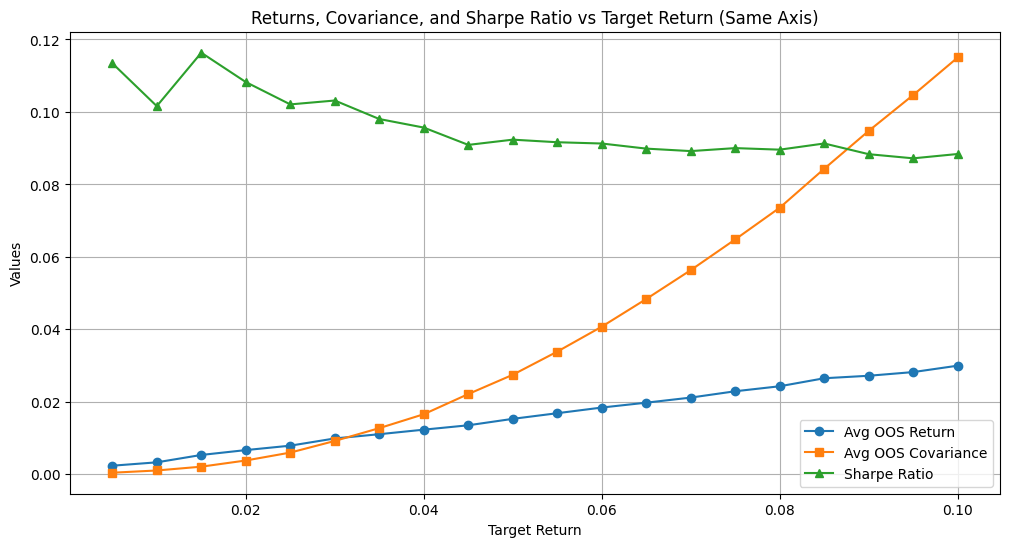

In [119]:
import matplotlib.pyplot as plt
import numpy as np

# Convert dicts → arrays sorted by target return order
t_vals = np.array(target_returns)

avg_returns_arr = np.array([averages[t] for t in t_vals])
avg_cov_arr     = np.array([covariance_averages[t] for t in t_vals])
sharpe_arr      = np.array([sharpe_ratios[t] for t in t_vals])

plt.figure(figsize=(12,6))

plt.plot(t_vals, avg_returns_arr, marker='o', label="Avg OOS Return")
plt.plot(t_vals, avg_cov_arr, marker='s', label="Avg OOS Covariance")
plt.plot(t_vals, sharpe_arr, marker='^', label="Sharpe Ratio")

plt.xlabel("Target Return")
plt.ylabel("Values")
plt.title("Returns, Covariance, and Sharpe Ratio vs Target Return (Same Axis)")
plt.grid(True)
plt.legend()

plt.show()


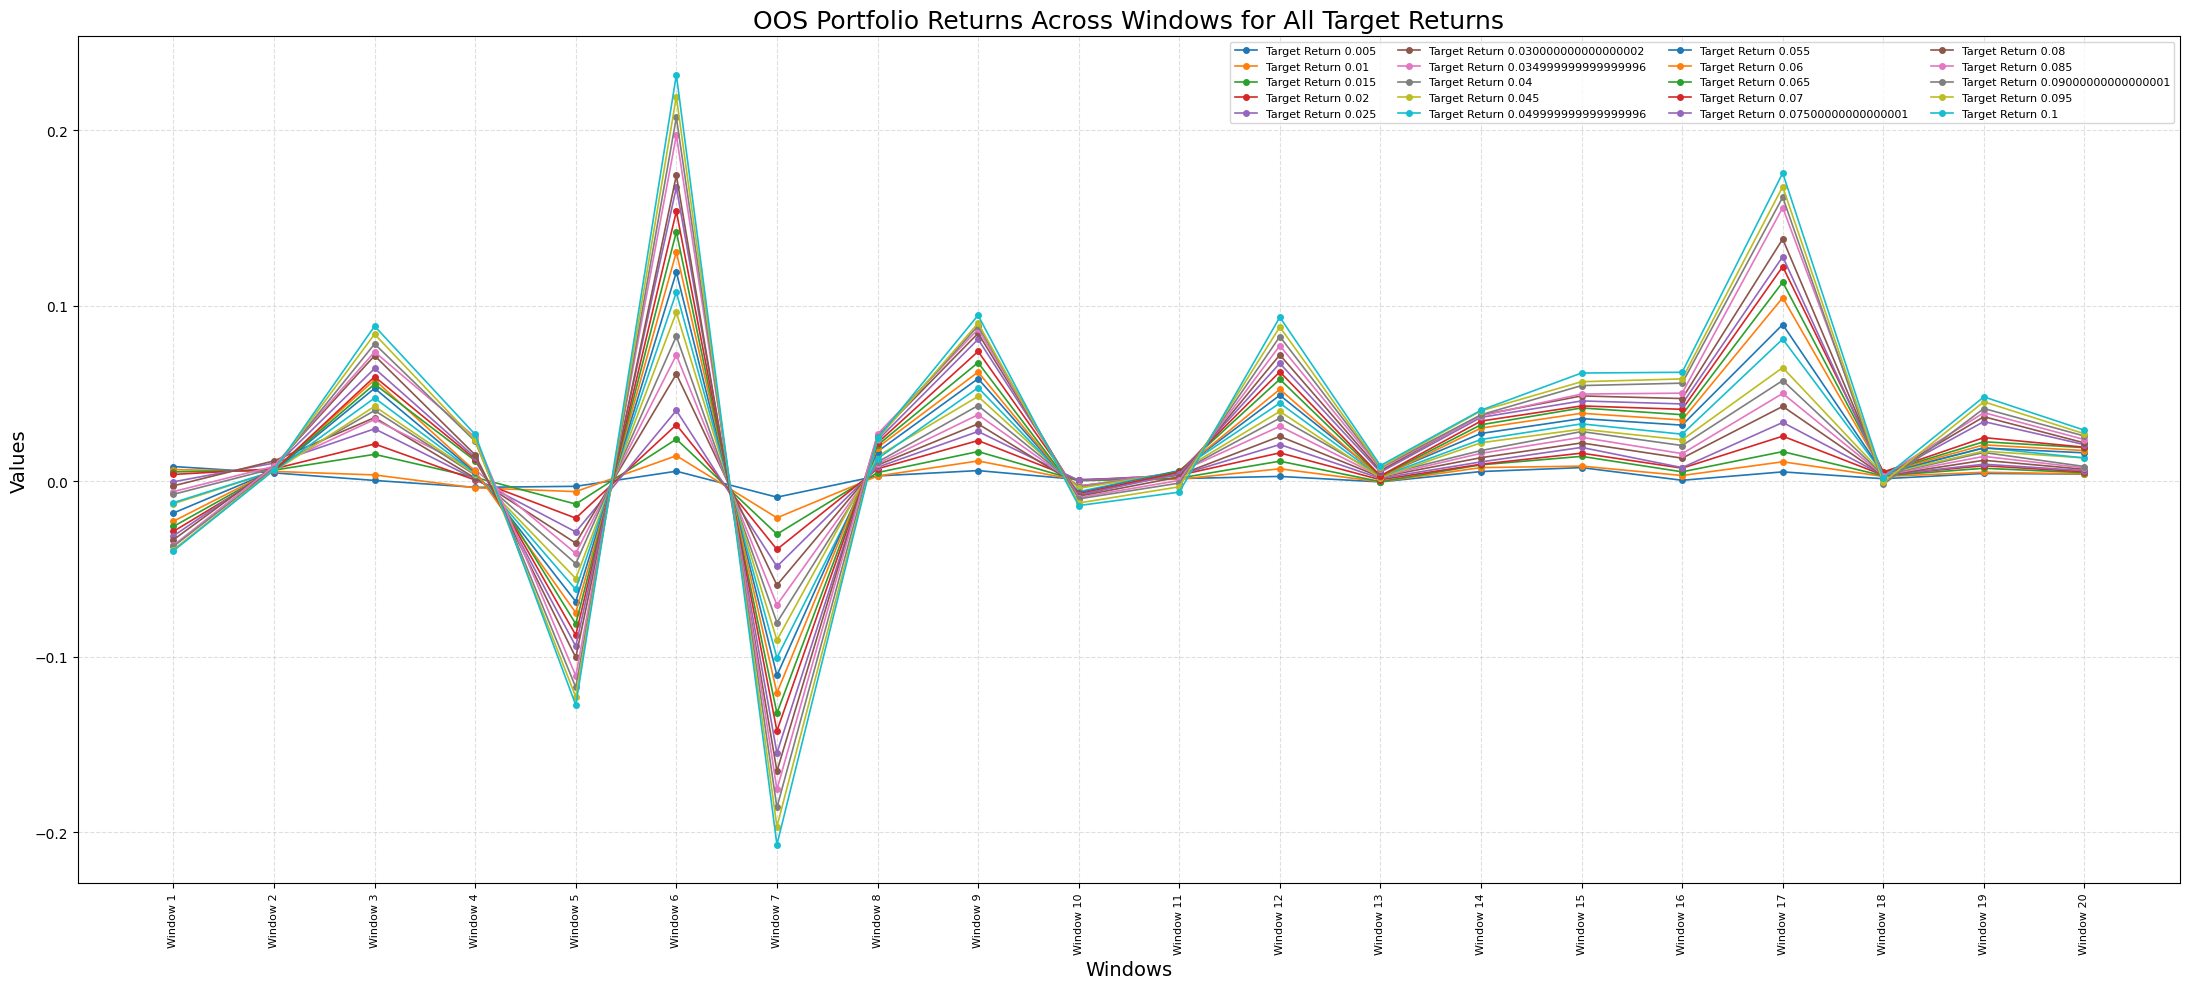

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------------------------
#   PLOT OOS RETURNS FOR EACH WINDOW
# ----------------------------------------------

plt.figure(figsize=(22, 10))

# Number of windows (same for all target returns)
num_windows = len(next(iter(element_wise_results.values())))
window_labels = [f"Window {i+1}" for i in range(num_windows)]

for t in target_returns:
    values = element_wise_results[t]
    plt.plot(window_labels, 
             values, 
             marker='o', 
             markersize=4, 
             linewidth=1.2, 
             label=f"Target Return {t}")

plt.xlabel("Windows", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.title("OOS Portfolio Returns Across Windows for All Target Returns", fontsize=18)

plt.xticks(rotation=90, fontsize=8)
plt.grid(True, linestyle='--', alpha=0.4)

plt.legend(ncol=4, fontsize=8)
plt.tight_layout()

plt.show()


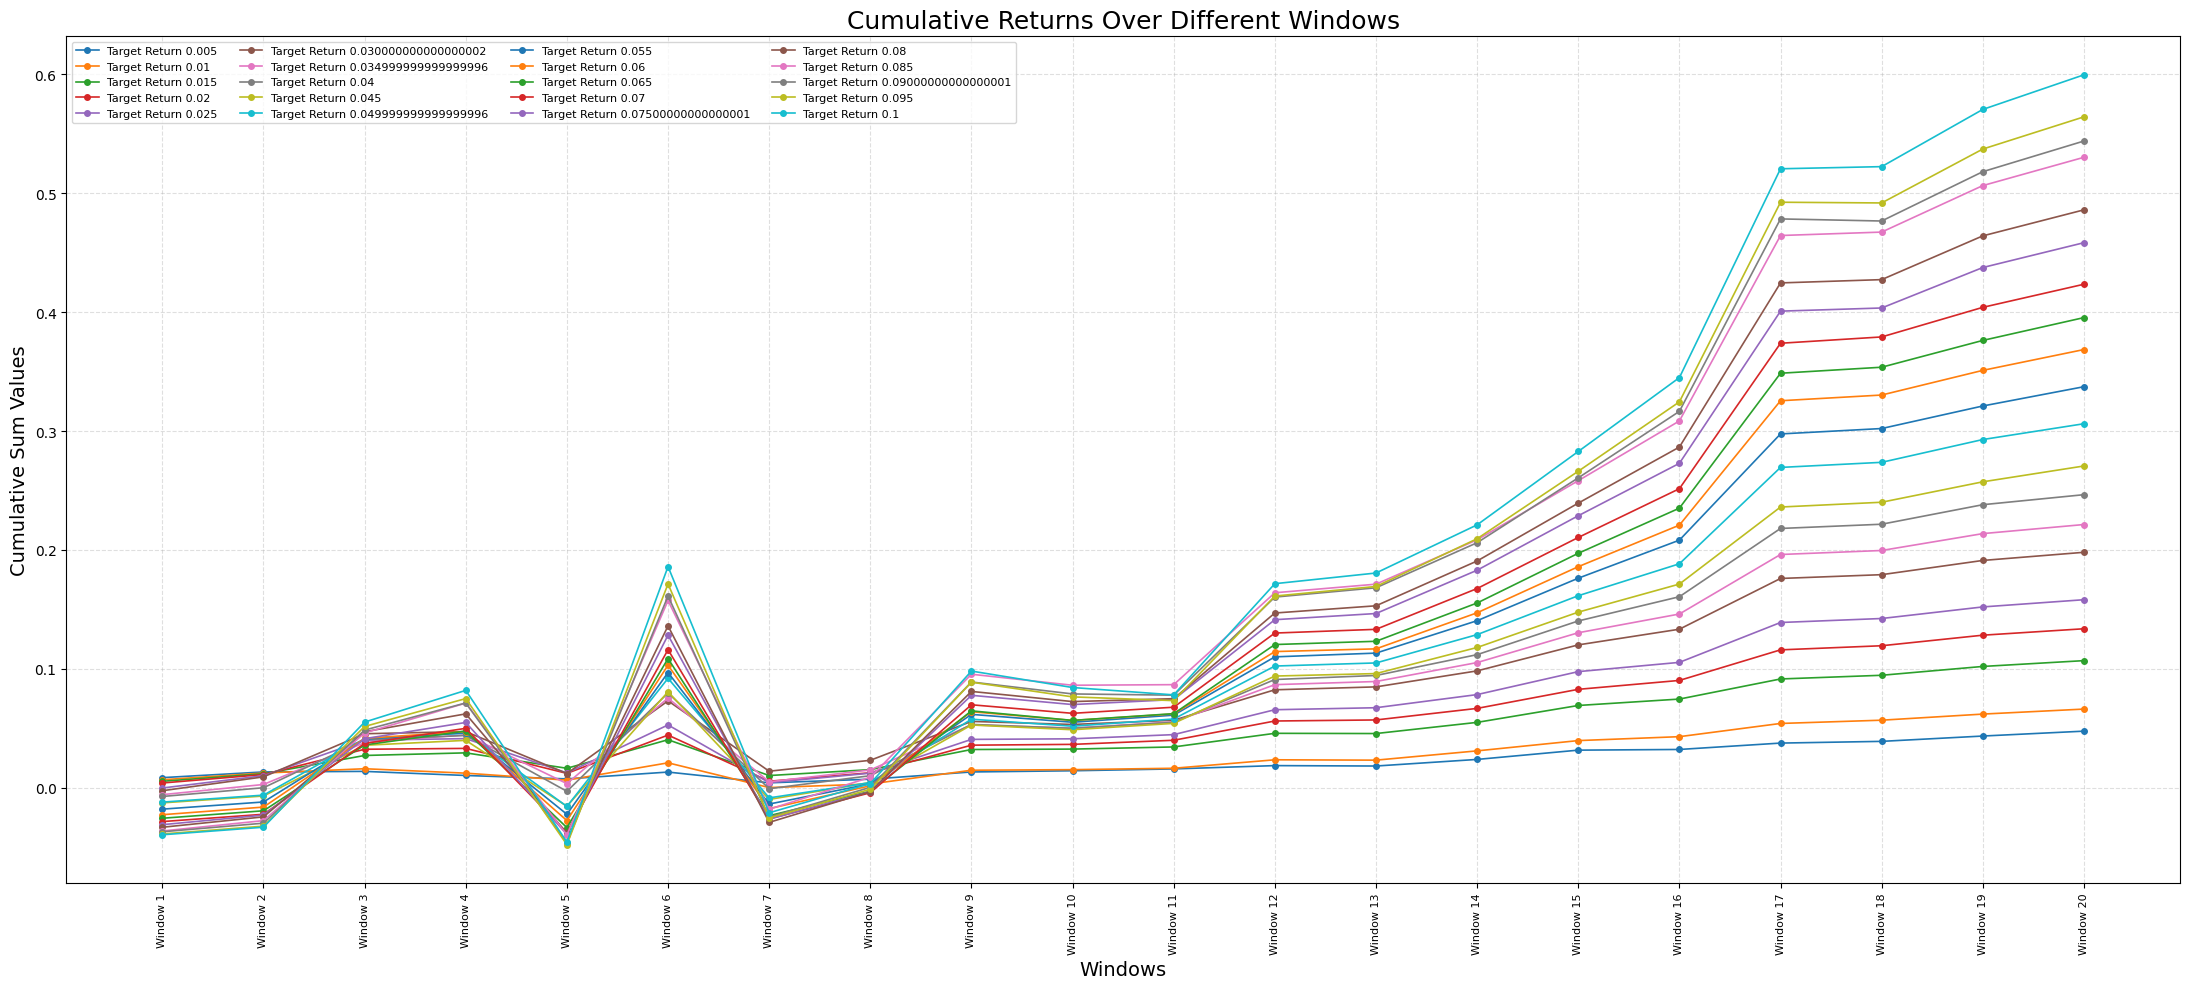

In [121]:
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------------------------
#   PLOT CUMULATIVE RETURNS FOR ALL TARGET RETURNS
# ----------------------------------------------

plt.figure(figsize=(22, 10))

# Number of windows
num_windows = len(next(iter(element_wise_results.values())))
window_labels = [f"Window {i+1}" for i in range(num_windows)]

for t in target_returns:
    values = np.array(element_wise_results[t])
    cumulative = np.cumsum(values)

    plt.plot(
        window_labels,
        cumulative,
        marker='o',
        markersize=4,
        linewidth=1.2,
        label=f"Target Return {t}"
    )

plt.xlabel("Windows", fontsize=14)
plt.ylabel("Cumulative Sum Values", fontsize=14)
plt.title("Cumulative Returns Over Different Windows", fontsize=18)

plt.xticks(rotation=90, fontsize=8)
plt.grid(True, linestyle='--', alpha=0.4)

plt.legend(ncol=4, fontsize=8)
plt.tight_layout()

plt.show()
